This file is for editing and preparing the CSV data of all the archived runs in MLFlow for the thesis. 

In [15]:
import pandas as pd

df = pd.read_csv('runs.csv')

df = df.sort_values(by=['domain', 'Start Time']) 

df = df[['Name', 'balanced_test_accuracy', 'balanced_train_accuracy', 'f1', 'precision', 'recall', 'sensitivity', 'specificity', 'roc_auc', 'std_balanced_test_accuracy', 'algorithm.1', 'domain']]
df = df.rename(columns={'algorithm.1': 'algorithm'})

# reindex the dataframe
df = df.reset_index(drop=True)


display(df)

df.to_csv('runs_processed.csv', index=True)

,Name,balanced_test_accuracy,balanced_train_accuracy,f1,precision,recall,sensitivity,specificity,roc_auc,std_balanced_test_accuracy,algorithm,domain
0,LR fft,0.583,1.000,0.539,0.608,0.492,0.577,0.611,0.568,0.042,Logistic Regression,Frequency Domain
1,RF fft,0.542,1.000,0.521,0.622,0.508,0.522,0.524,0.384,0.208,Random Forest,Frequency Domain
2,SVM fft,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Support Vector Machine,Frequency Domain
3,KNN fft,0.362,0.698,0.117,0.175,0.092,0.412,0.200,0.231,0.148,K Nearest Neighbors,Frequency Domain
4,LR fft + standardization,0.608,1.000,0.581,0.629,0.542,0.600,0.632,0.560,0.073,Logistic Regression,Frequency Domain
...,...,...,...,...,...,...,...,...,...,...,...,...
108,SVM data augmentation: 3 forward scans only fo...,0.529,0.742,0.467,0.510,0.475,0.520,0.526,0.621,0.174,Support Vector Machine,Time Domain
109,SVM data augmentation: 6 forward scans only fo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Support Vector Machine,Time Domain
110,SVM data augmentation: averaging (but only 3 p...,0.525,0.827,0.333,0.312,0.400,0.500,0.500,0.500,0.134,Support Vector Machine,Time Domain
111,SVM data augmentation: using only subsets (see...,0.608,0.601,0.522,0.610,0.483,0.593,0.647,0.473,0.196,Support Vector Machine,Time Domain


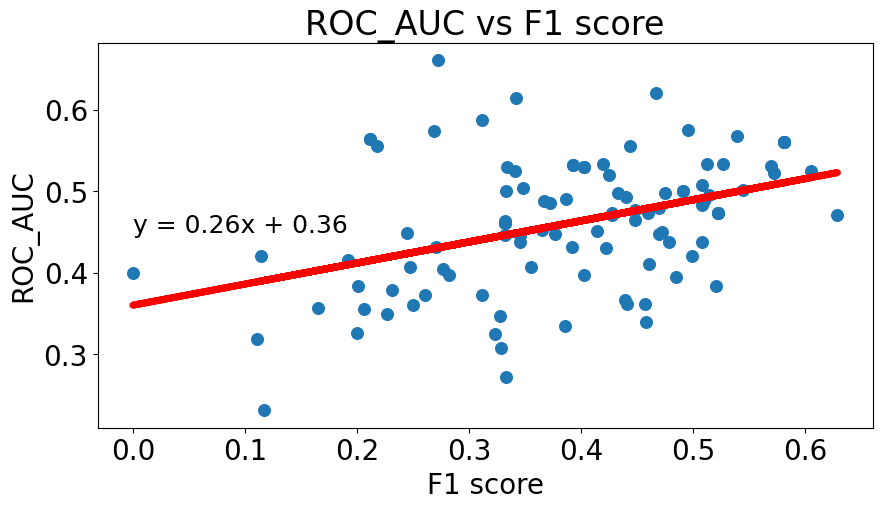

In [34]:
# This is for plotting the ROC_AUC vs F1 score


import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

df = pd.read_csv('runs.csv')

plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(10, 5))
plt.scatter(df['f1'], df['roc_auc'], s=70)


X = df['f1'].values.reshape(-1, 1)
y = df['roc_auc'].values

# dropping nans to avoid error
X = X[~np.isnan(y)]
y = y[~np.isnan(y)]

reg = LinearRegression().fit(X, y)


plt.plot(X, reg.predict(X), color='red', linewidth=5)
plt.text(0, 0.45, 'y = ' + str(round(reg.coef_[0], 2)) + 'x + ' + str(round(reg.intercept_, 2)), fontsize=18)
plt.xlabel('F1 score')
plt.ylabel('ROC_AUC')
plt.title('ROC_AUC vs F1 score')
plt.show()


In [9]:
import pandas as pd

# Read the processed file
# Then generate a new one based on subset of columns
df = pd.read_csv('runs.csv')

df = df[['Name', 'balanced_test_accuracy', 'f1', 'recall', 'roc_auc']]

df.dropna(inplace=True)

df.to_csv('runs_subset.csv', index=False)